# Coding Homework Week 4: Fashion MNIST Classification

Continue working on the fashion MNIST dataset, play around with two hyperparameters, learning rate and optimizer, and see how they will influence the accuracy. Experiment with multiple learning rates and 3 optimizers. 

Summarize the results into a matplotlib figure, where the X-axis represents the learning rate, Y-axis represents the accuracy, each colored curve corresponds to one chosen optimizer.

In [9]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt

import seaborn as sns

### Load the Fashion MNIST Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Define the output class names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

### Plot an example image

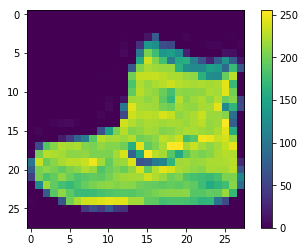

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Normalize the input data

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Define the optimizer and learning rate grid for iteration

In [7]:
optimizers = [
    keras.optimizers.Adam,
    keras.optimizers.SGD,
    keras.optimizers.Adagrad,
    keras.optimizers.Adadelta,
    keras.optimizers.RMSprop
]

learning_rates = [2**x for x in range(-20, 7)]

### Iterate through the optimizers and learning rates to generate the plot data

The common hyperparameters chosen for each iteration is one hidden layer with 128 neurons, 10 epochs, and a softmax output for the 10 classes

In [8]:
data = []
for optimizer in optimizers:
    for learning_rate in learning_rates:
        
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(128, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

        opt = optimizer(lr=learning_rate)
        model.compile(optimizer=opt, 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        h = model.fit(train_images, train_labels, epochs=10, verbose=0)

        data.append({
            'Optimizer': optimizer.__name__,
            'Learning Rate': learning_rate,
            'Accuracy': h.history['acc'][-1]
        })
        
        print("Completed: {}".format(data[-1]))
        
results = pd.DataFrame(data)

Instructions for updating:
Colocations handled automatically by placer.
Completed: {'Optimizer': 'Adam', 'Learning Rate': 9.5367431640625e-07, 'Accuracy': 0.67768335}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 1.9073486328125e-06, 'Accuracy': 0.75418335}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 3.814697265625e-06, 'Accuracy': 0.7965}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 7.62939453125e-06, 'Accuracy': 0.82318336}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 1.52587890625e-05, 'Accuracy': 0.84495}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 3.0517578125e-05, 'Accuracy': 0.86125}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 6.103515625e-05, 'Accuracy': 0.8739167}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 0.0001220703125, 'Accuracy': 0.88498336}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 0.000244140625, 'Accuracy': 0.90003335}
Completed: {'Optimizer': 'Adam', 'Learning Rate': 0.00048828125, 'Accuracy': 0.90785}
Completed: {'Optimi

Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.00390625, 'Accuracy': 0.79435}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.0078125, 'Accuracy': 0.8240167}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.015625, 'Accuracy': 0.84188336}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.03125, 'Accuracy': 0.8559}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.0625, 'Accuracy': 0.8699667}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.125, 'Accuracy': 0.8824}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.25, 'Accuracy': 0.89175}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 0.5, 'Accuracy': 0.9025667}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 1, 'Accuracy': 0.90865}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 2, 'Accuracy': 0.9069667}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 4, 'Accuracy': 0.9004667}
Completed: {'Optimizer': 'Adadelta', 'Learning Rate': 8, 'Accuracy': 0.8850333}
Complet

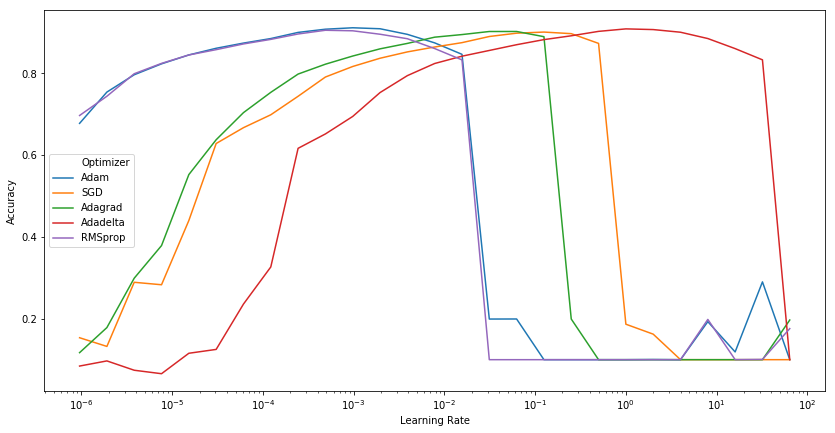

In [16]:
f, ax = plt.subplots(figsize=(14, 7))
ax.set(xscale="log")
ax = sns.lineplot(x='Learning Rate', y='Accuracy', hue='Optimizer', ax=ax, data=results)

### Remarks:

This exercize has shown that you must pick a learning rate that optimizes the training performance of your optimizer - as you can see above different optimizers require different learning rates for optimal performance.